# 单变量线性回归（Linear Regression with One Variable）
## 浙江理工大学 沈炜

## 机器学习的分类
<img src='1.png'>

# 使用Tensorflow进行算法设计与训练的核心步骤

- ** （1）生成数据 **
- ** （2）构建模型 **
- ** （3）训练模型 **
- ** （4）进行预测 **

上述步骤是我们使用Tensorflow进行算法设计与训练的核心步骤，贯穿于后面介绍的具体实战中。<br>
本节用一个简单的例子来讲解这几个步骤。



# 有监督机器学习过程示意图

<img src="What-is-Supervised-Learning-Machine-Learning-Tutorial-Edureka.png">

## Tensorflow实现单变量线性回归

假设我们要用机器学习找到的函数表达式为$ y=2x+1 $

**准备**

In [1]:
#在Jupyter中，使用matplotlib显示图像需要设置为 inline 模式，否则不会现实图像
%matplotlib inline
#%matplotlib notebook

import matplotlib.pyplot as plt # 载入matplotlib
import numpy as np # 载入numpy
import tensorflow as tf # 载入Tensorflow

np.random.seed(5)  # 设置随机种子

c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

### 几个重要的包，用于科学计算
<img src='2.png'>
- NumPy(Numerical Python) 是 Python 语言的一个扩展程序库，支持大量的维度数组与矩阵运算，此外也针对数组运算提供大量的数学函数库。NumPy 通常与 SciPy（Scientific Python）和 Matplotlib（绘图库）一起使用，<font color=red>**这种组合广泛用于替代 MatLab**</font>，是一个强大的科学计算环境，有助于我们通过 Python 学习数据科学或者机器学习。
- Matplotlib 是 Python 编程语言及其数值数学扩展包 NumPy 的可视化操作界面。它为利用通用的图形用户界面工具包，如 Tkinter, wxPython, Qt 或 GTK+ 向应用程序嵌入式绘图提供了应用程序接口（API）。
- SciPy 是一个开源的 Python 算法库和数学工具包。SciPy 包含的模块有最优化、线性代数、积分、插值、特殊函数、快速傅里叶变换、信号处理和图像处理、常微分方程求解和其他科学与工程中常用的计算。
- pandas 是基于NumPy 的一种工具，该工具是为了解决数据分析任务而创建的。Pandas 纳入了大量库和一些标准的数据模型，提供了高效地操作大型数据集所需的工具。pandas提供了大量能使我们快速便捷地处理数据的函数和方法。你很快就会发现，它是使Python成为强大而高效的数据分析环境的重要因素之一。

**numpy参考**<br>
下面这张图很大，建议用1:1方式打开，本页面显示缩小了
<img src='numpy.png'>

**生成输入数据** <br>
我们需要构造满足这个函数的$x$和$y$同时加入一些不满足方程的噪声，增加数据的不确定性。

In [2]:
x_data = np.linspace(-1, 1, 100) #直接采用np生成等差数列的方法，生成100个点，每个点的取值在-1~1之间
x_data.shape,x_data

((100,),
 array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
        -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182,
        -0.7979798 , -0.77777778, -0.75757576, -0.73737374, -0.71717172,
        -0.6969697 , -0.67676768, -0.65656566, -0.63636364, -0.61616162,
        -0.5959596 , -0.57575758, -0.55555556, -0.53535354, -0.51515152,
        -0.49494949, -0.47474747, -0.45454545, -0.43434343, -0.41414141,
        -0.39393939, -0.37373737, -0.35353535, -0.33333333, -0.31313131,
        -0.29292929, -0.27272727, -0.25252525, -0.23232323, -0.21212121,
        -0.19191919, -0.17171717, -0.15151515, -0.13131313, -0.11111111,
        -0.09090909, -0.07070707, -0.05050505, -0.03030303, -0.01010101,
         0.01010101,  0.03030303,  0.05050505,  0.07070707,  0.09090909,
         0.11111111,  0.13131313,  0.15151515,  0.17171717,  0.19191919,
         0.21212121,  0.23232323,  0.25252525,  0.27272727,  0.29292929,
         0.31313131,  0.33333333,  0.35353

In [3]:
x_data*0.4

array([-0.4       , -0.39191919, -0.38383838, -0.37575758, -0.36767677,
       -0.35959596, -0.35151515, -0.34343434, -0.33535354, -0.32727273,
       -0.31919192, -0.31111111, -0.3030303 , -0.29494949, -0.28686869,
       -0.27878788, -0.27070707, -0.26262626, -0.25454545, -0.24646465,
       -0.23838384, -0.23030303, -0.22222222, -0.21414141, -0.20606061,
       -0.1979798 , -0.18989899, -0.18181818, -0.17373737, -0.16565657,
       -0.15757576, -0.14949495, -0.14141414, -0.13333333, -0.12525253,
       -0.11717172, -0.10909091, -0.1010101 , -0.09292929, -0.08484848,
       -0.07676768, -0.06868687, -0.06060606, -0.05252525, -0.04444444,
       -0.03636364, -0.02828283, -0.02020202, -0.01212121, -0.0040404 ,
        0.0040404 ,  0.01212121,  0.02020202,  0.02828283,  0.03636364,
        0.04444444,  0.05252525,  0.06060606,  0.06868687,  0.07676768,
        0.08484848,  0.09292929,  0.1010101 ,  0.10909091,  0.11717172,
        0.12525253,  0.13333333,  0.14141414,  0.14949495,  0.15

In [4]:
y_data = 2 * x_data + 1.0 + np.random.randn(*x_data.shape) * 0.4  # y = 2x +1 + 噪声， 其中，噪声的维度与x_data一致
#注意上一行*用法，序列解包
y_data

array([-8.23509005e-01, -1.09194402e+00,  5.31165556e-02, -9.79624731e-01,
       -7.94539902e-01, -1.64987351e-01, -1.12126872e+00, -9.53826380e-01,
       -6.01726386e-01, -7.68311619e-01, -1.07306544e+00, -6.37506160e-01,
       -6.58683094e-01, -2.33358834e-01, -1.10025885e+00, -6.74011009e-01,
        1.07021050e-01,  4.29801090e-01, -8.77199096e-01,  2.56157720e-02,
       -5.84162346e-01, -4.94256413e-01, -4.59862784e-01, -2.39710242e-01,
        3.68272900e-01,  2.95069518e-01,  7.41627478e-02, -5.44152605e-02,
        1.32628668e-01,  1.29344995e-01,  5.29342540e-01, -1.03399392e-04,
        2.90451330e-01,  2.92906289e-01,  3.52814113e-01,  5.13828478e-01,
        5.33609491e-01,  1.02888892e+00,  5.00603293e-01,  1.20037049e+00,
        4.93820408e-01,  4.65473090e-01,  7.37264972e-01,  8.79549126e-01,
        8.85622740e-01,  1.33496717e+00,  1.31432305e+00,  1.09676606e+00,
        8.04859436e-01,  9.39552241e-01,  1.58556123e+00,  1.14910771e+00,
        5.76700848e-01,  

numpy.random.rand(d0,d1,…,dn)
- rand函数根据给定维度生成[0,1)之间的数据，包含0，不包含1
- dn表示每个维度
- 返回值为指定维度的array

** 利用matplotlib画图 **

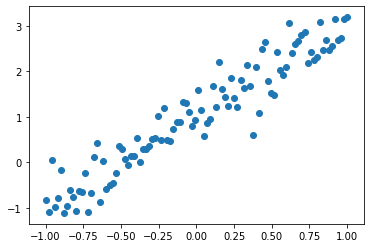

In [5]:
plt.figure() # 创建一个图形实例
plt.scatter(x_data, y_data) #画出随机生成数据的散点图

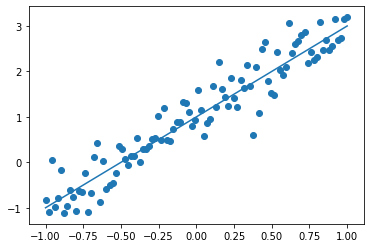

In [6]:
plt.scatter(x_data, y_data) 
plt.plot (x_data, 1.0 + 2 * x_data) # 画出我们想要学习到的线性函数 y = 2x +1

## 学习目的
<font color=red>通过学习这一系列点的横坐标和纵坐标，来总结得到能够描述这些点分布的线性函数</font>。  
已知：
- 点的横纵座标
- 点的分布基本满足线性关系  

求：
- 这个线性关系，即$y=wx+b$中的$w$和$b$。（请大家注意这个$w$和$b$，后面还会碰到）

## 构建模型

** 定义$x$和$y$的占位符 **

In [7]:
x = tf.placeholder("float", name = "x")   # 为了导入数据，初值未知
y = tf.placeholder("float", name = "y")

** 构建回归模型 **

In [8]:
def model(x, w, b):
    return tf.multiply(x, w) + b #数乘

** 创建变量 **
- Tensorflow变量的声明函数是tf.Variable
- tf.Variable的作用是保存和更新参数
- 变量的初始值可以是随机数、常数，或是通过其他变量的初始值计算得到

In [9]:
w = tf.Variable(-1.0, name="w0") # 构建线性函数的斜率，初值预先设定
b = tf.Variable(0.0, name="b0")   # 构建线性函数的截距

In [10]:
pred = model(x, w, b) # pred是训练值

## <font color=red>定义模型训练</font>
<img src='train.jpeg' width=300 height=290>

** 设置训练参数 **

In [11]:
train_epochs = 30 # 迭代次数
learning_rate = 0.05 #学习率

** 关于学习率（learning_rate）的设置 **<br>
- 学习率的作用：控制参数更新的幅度。
- 如果学习率设置过大，可能导致参数在极值附近来回摇摆，无法保证收敛。
- 如果学习率设置过小，虽然能保证收敛，但优化速度会大大降低，我们需要更多迭代次数才能达到较理想的优化效果。
<img src='rate.jpg'>

** 定义损失函数 **
<br>
- 损失函数用于描述预测值与真实值之间的误差，从而指导模型收敛方向
- 常见损失函数：均方差（Mean Square Error, MSE）和交叉熵（cross-entropy）<br>
<img src='损失.png' width=640 height=480>

In [12]:
# loss_function = tf.pow(y-pred, 2) # 采用方差作为损失函数
loss_function = tf.reduce_mean(tf.square(y-pred))  # 本例中采用均方差作为损失函数，注意参数：y-pred，即实际值和预测值的差

** 选择优化器 **

In [14]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)# 梯度下降

<img src='gradient.jpg'>

** 声明会话 **

In [15]:
sess = tf.Session()

** 变量初始化定义 **
- 在真正执行计算之前，需将所有变量初始化
- 通过** tf.global_variables_initializer **函数可实现对所有变量的初始化

In [16]:
init = tf.global_variables_initializer()

** <font color=red>执行训练</font> **

2.6395793 0.21075253
1.1767894 1.8328444
1.0533826 1.9696885
1.0429721 1.9812326
1.0420938 1.9822065
1.0420198 1.9822885
1.0420135 1.9822958
1.0420123 1.982297
1.0420128 1.9822965
1.0420128 1.9822965
1.0420128 1.9822965
1.0420128 1.9822965
1.0420128 1.9822965
1.0420128 1.9822965
1.0420128 1.9822965
1.0420128 1.9822965
1.0420128 1.9822965
1.0420128 1.9822965
1.0420128 1.9822965
1.0420128 1.9822965
1.0420128 1.9822965
1.0420128 1.9822965
1.0420128 1.9822965
1.0420128 1.9822965
1.0420128 1.9822965
1.0420128 1.9822965
1.0420128 1.9822965
1.0420128 1.9822965
1.0420128 1.9822965
1.0420128 1.9822965


(<tf.Variable 'w0:0' shape=() dtype=float32_ref>,
 <tf.Variable 'b0:0' shape=() dtype=float32_ref>)

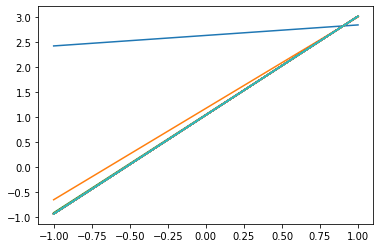

In [17]:
sess.run(init) # 执行初始化

for epoch in range(train_epochs):
    for xs,ys in zip(x_data, y_data):
        _, loss=sess.run([optimizer,loss_function], feed_dict={x: xs, y: ys})      
    b0temp=b.eval(session=sess)
    w0temp=w.eval(session=sess)
    print(b0temp,w0temp)
    plt.plot (x_data, b0temp + w0temp * x_data )# 画图

w,b

从上图可以看出，由于本案例所拟合的模型较简单，训练3次之后已经接近收敛。<br> 对于复杂模型，需要更多次训练才能收敛。

** 打印结果 **

In [18]:
print  ("w：", sess.run(w)) # w的值应该在2附近 
print ("b：", sess.run(b)) # b的值应该在1附近 

w： 1.9822965
b： 1.0420128


** 可视化 **

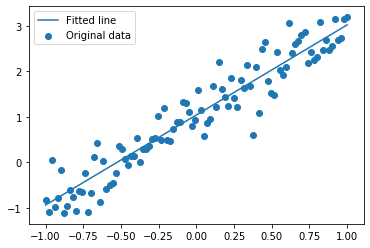

In [19]:
plt.scatter(x_data,y_data,label='Original data')
plt.plot (x_data, x_data * sess.run(w) + sess.run(b),label='Fitted line')
plt.legend(loc=2)# 通过参数loc指定图例位置

## 进行预测

In [20]:
x_test = 12.0
output = sess.run(w)  * x_test + sess.run(b)
print("预测值：%f" % output)
target = 2 * x_test + 1.0
print("目标值：%f" % target)

预测值：24.829570
目标值：25.000000


** 以上是利用Tensorflow训练一个线性模型并进行预测的完整过程。<br> 通过逐渐降低损失值loss来训练参数$w$和$b$拟合 $y = 2x + 1$中的系数2和1。 ** 

## 实验题
### 实验题1：请你修改本实例代码，线性函数变为y=3x+1，并改变数据集，尝试输出结果。